# Lab One: Visualization and Data Preprocessing
### Ryan Bass, Brett Benefield, Cho Kim, Nicole Wittlin

### Business Understanding

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific. CHUNK TO BE DELETED AFTER SECTION IS COMPLETE

The team selected data from the Belk Endowment Educational Attainment Data for North Carolina Public Schools, which contains the North Carolina Public Schools Report Card as well as the Statistical Profiles Databases. This data was compiled by Dr. Jake Drew from original sources provided by the Public Schools of North Carolina (http://ncpublicschools.org), and the compilation, research, and analysis of the educational attainment data was funded by the John M. Belk Endowment (JMBE).

JMBE’s mission is focused on postsecondary education in North Carolina to help underrepresented students access and complete postsecondary education and be better prepared for entering the workforce. The educational attainment data set contains comprehensive statistics, demographics, and achievement metrics about North Carolina public, charter, and alternative elementary, middle, and high schools. This wealth of data is the foundation for research to help JMBE understand trends and improve postsecondary pathways in the state.

Our team has selected a subset from the larger educational attainment data to explore the relationship between enrollment in postsecondary education within 16 months of high school graduation and teacher metrics related to teacher education, licensing, and certification, in addition to years of experience. This is important to help identify both positive and negative factors influencing students’ enrollment decisions and understand how educators can impact the pipeline to higher education.

Our efforts will include a model that will attempt to predict the probability of a student seeking postsecondary education with a probably greater than 50%, or random chance. The effectiveness of a model can be measured by how accurately the prediction algorithm can predict the percentage of students enrolled in a postsecondary education institution. NEED MORE SPECIFIC DETAILS HERE

 
#### Define and Measure outcomes:


### Data Meaning Type
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

We used the <a href="https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Raw%20Datasets/college-enrollment.csv">College Enrollment data set</a> and the <a href="https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Raw%20Datasets/personnel.csv">Personnel data set</a> available in the <a href="https://github.com/jakemdrew/EducationDataNC">EducationDataNC</a> repository published by Dr. Drew. 

#### College Enrollment data set
The college enrollment data set we examined has 12,827 rows of data, with 13 attributes. The data set contains counts and percentages of postsecondary enrollment action as defined by the US Department of Education C160 EDEN (Education Data Exchange Network) for students who graduated in 2015. The data has subgroups of counts and percentages by school, district, and the state. A status of ENROLL means the count or percentage enrolled in an institution of higher education (IHE) within 16 months of receiving a regular high school diploma, and NOENROLL means the count or percentage of students who did not enroll in an IHE within 16 months of receiving a high school diploma. 

The description of the attributes below can be found in the <a href="http://www.ncpublicschools.org/docs/src/researchers/data-dictionary.pdf">data dictionary</a> published by the NC Public Schools. 

| Attribute | Description | Type | % missing |
|----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|----------------------------|
| Graduation_year | Year students graduated from high school | Nominal | insert grad_year % misisng |
| Unit_code | Code to identify school/LEA/State<br> Unit codes belonging to individual schools may be mapped to a given district using the first 3 characters of the unit code. For example, schools belonging to the district "995LEA" will each have unit code that begins with 995. | Nominal | insert Unit_code % missing |
| leaname | LEA (Local Education Agency) Name <br> LEA is a commonly used acronym for a school district | Nominal | insert leaname % |
| schname | School Name | Nominal | insert schname % |
| status | The postsecondary enrollment action as defined in the US Department of Education C160 EDEN (Education Data Exchange Network) specification <br>  <table><tr><td>ENROLL</td><td>Enrolled in an IHE within 16 months of receiving a regular high school diploma</td></tr> <tr><td>NOENROLL</td><td>Did not enroll in an IHE within 16 months of receiving a regular high school diploma</td></tr> </table> | Nominal | insert status% |
| subgroup | A subset of the total population that shares a common characteristic, like sex or race <br> <table><tr><td>EDS</td><td>Economically Disadvantaged</td></tr><tr><td>NOT_EDS</td><td>Not Economically Disadvantaged</td></tr><tr><td>LEP</td><td>Limited English Proficiency</td></tr><tr><td>SWD</td><td>Students With Disabilities</td></tr><tr><td>WHTE</td><td>White</td></tr><tr><td>BLCK</td><td>Black</td></tr><tr><td>HISP</td><td>Hispanic</td></tr><tr><td>AMIN</td><td>American Indian</td></tr><tr><td>ASIA</td><td>Asian</td></tr><tr><td>MULT</td><td>Two or More Races</td></tr><tr><td>MALE</td><td>Male</td></tr><tr><td>FEM</td><td>Female</td></tr><tr><td>ALL</td><td>All Students</td></tr><tr><td>AIG</td><td>Academically/Intellectually Gifted</td></tr><tr><td>PACI</td><td>Pacific Islander</td></tr></table> | Nominal | insert subgroup% |
| Subgroup_name | Full description of the subgroup | Nominal | insert subgroup name % |
| schcount | Count of students by subgroup and status (ENROLL, NOENROLL) within a school with masking applied | Continuous | insert schcount% |
| leacount | Count of students by subgroup and status (ENROLL, NOENROLL) within a LEA/Charter with masking applied | Continuous | insert leacount% |
| seacount | Count of students by subgroup and status (ENROLL, NOENROLL) within the State (SEA - State Educational Agency) | Continuous | insert seacount% |
| sch_percent_enrolled | The percentage of enrolled students among total students (ENROLL Count/ TOTAL Count) within a school with masking applied | Ordinal | insert schpercentenrolled |
| lea_percent_enrolled | The percentage of enrolled students among total students (ENROLL Count/ TOTAL Count) within a LEA/Charter with masking applied | Ordinal | insert leapercentenrl% |
| sea_percent_enrolled | The percentage of enrolled students among total students (ENROLL Count/ TOTAL Count) within the State (SEA) | Ordinal | insert seapercentenrl% |

#### College Enrollment Table Summary

The schcount is the count of students within a school that enrolled or did not enroll in an institute of higher education within 16 months of receiving their high school diploma. The values range from 5 to 423 in the data set. 

The leacount is the count of students within a LEA or Charter by subgroup and status. The values range from 5 to 5844 in the data set.

The seacount is the count of students within the state by subgroup and status. The values range from 49 to 51,362.

The "...percent_enrolled" attributes are on a scale from 0 to 100 and represent the percentage of enrolled students among total students within the school, LEA/Charter, or the state. 

#### Personnel
| Column Name                    | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | Type       |
|--------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| Year                           | School Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | Nominal    |
| Unit_code                      | Code to identify School/LEA/State                                                                                                                                                                                                                                                                                                                                                                                                                                              | Nominal    |
| Lea_Name                       | LEA Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | Nominal    |
| State_Name                     | State Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | Nominal    |
| Category_cd                    | Category code<br> <table><tr><td>E</td><td>School has elementary schools grades (PK-5)</td></tr> <tr><td>M</td><td>School has middle school grades (6-8)</td></tr> <tr><td>H</td><td>School has high school grades (9-13)</td></tr> <tr><td>I</td><td>School has elementary and middle school grades</td></tr> <tr><td>T</td><td>School has middle and high school grades</td></tr> <tr><td>A</td><td>School has elementary, middle, and high school grades</td></tr> </table> | Nominal    |
| Prin_advance_dgr_pct           | Percent of principals with advanced degrees at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                       | Ordinal    |
| St_Prin_advance_dgr_pct        | Percent of principals with advanced degrees at state level                                                                                                                                                                                                                                                                                                                                                                                                                     | Ordinal    |
| _1yr_prin_trnovr_pct           | One year principal turnover rate at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                  | Ordinal    |
| St_1yr_prin_trnovr_pct         | One year principal turnover rate at state level                                                                                                                                                                                                                                                                                                                                                                                                                                | Ordinal    |
| Prin_male_pct                  | Percent of male principals at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                        | Ordinal    |
| St_Prin_male_pct               | Percent of male principals at state level                                                                                                                                                                                                                                                                                                                                                                                                                                      | Ordinal    |
| Prin_female_pct                | Percent of female principals at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                      | Ordinal    |
| St_prin_female_pct             | Percent of female principals at state level                                                                                                                                                                                                                                                                                                                                                                                                                                    | Ordinal    |
| Prin_black_pct                 | Percent of black principals at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                       | Ordinal    |
| St_Prin_black_pct              | Percent of black principals at state level                                                                                                                                                                                                                                                                                                                                                                                                                                     | Ordinal    |
| Prin_white_pct                 | Percent of white principals at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                       | Ordinal    |
| St_Prin_white_pct              | Percent of white principals at state level                                                                                                                                                                                                                                                                                                                                                                                                                                     | Ordinal    |
| Prin_other_pct                 | Percent of principals of other races including Indian, Asian, Hispanic and Pacific-islander at LEA level                                                                                                                                                                                                                                                                                                                                                                       | Ordinal    |
| St_Prin_other_pct              | Percent of principals of other races including Indian, Asian, Hispanic and Pacific-islander at state level                                                                                                                                                                                                                                                                                                                                                                     | Ordinal    |
| Flicensed_teach_pct            | Percent of teachers that meet NC fully licensed definition at school level                                                                                                                                                                                                                                                                                                                                                                                                     | Ordinal    |
| Lea_flicensed_teach_pct        | Average Percent of Teachers that meet NC fully licensed definition at LEA level                                                                                                                                                                                                                                                                                                                                                                                                | Ordinal    |
| St_flicensed_teach_pct         | Average Percent of Teachers that meet NC fully licensed definition at state level                                                                                                                                                                                                                                                                                                                                                                                              | Ordinal    |
| Class_teach_num                | Average number of classroom teachers at School Level                                                                                                                                                                                                                                                                                                                                                                                                                           | Continuous |
| Lea_class_teach_num            | Average number of classroom teachers at LEA Level                                                                                                                                                                                                                                                                                                                                                                                                                              | Continuous |
| St_class_teach_num             | Average number of classroom teachers at State Level                                                                                                                                                                                                                                                                                                                                                                                                                            | Continuous |
| nbpts_num                      | Number of National Board Certified staff at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                          | Continuous |
| Lea_nbpts_num                  | Average number of National Board Certified staff at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                  | Continuous |
| St_nbpts_num                   | Average number of National Board Certified staff at state level                                                                                                                                                                                                                                                                                                                                                                                                                | Continuous |
| advance_dgr_pct                | Percent of teachers with masters or higher degree at school level                                                                                                                                                                                                                                                                                                                                                                                                              | Ordinal    |
| Lea_advance_dgr_pct            | Average percent of teachers with masters or higher degree at LEA level                                                                                                                                                                                                                                                                                                                                                                                                         | Ordinal    |
| St_advance_dgr_pct             | Average percent of teachers with masters or higher degree at state level                                                                                                                                                                                                                                                                                                                                                                                                       | Ordinal    |
| _1yr_tchr_trnovr_pct           | One Year Teacher turnover percentage at school level                                                                                                                                                                                                                                                                                                                                                                                                                           | Ordinal    |
| Lea_1yr_tchr_trnovr_pct        | One Year Teacher turnover percentage at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                              | Ordinal    |
| St_1yr_tchr_trnovr_pct         | One Year Teacher turnover percentage at state level                                                                                                                                                                                                                                                                                                                                                                                                                            | Ordinal    |
| Lateral_teach_pct              | lateral entry teacher percentage at school level                                                                                                                                                                                                                                                                                                                                                                                                                               | Ordinal    |
| Lea_lateral_teach_pct          | Average lateral entry teacher percentage at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                          | Ordinal    |
| St_lateral_teach_pct           | Average lateral entry teacher percentage at state level                                                                                                                                                                                                                                                                                                                                                                                                                        | Ordinal    |
| Highqual_class_pct             | Percent of highly qualified classes at school level                                                                                                                                                                                                                                                                                                                                                                                                                            | Ordinal    |
| Lea_highqual_class_pct         | Average highly qualified classes at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                  | Continuous |
| St_highqual_class_pct          | Average highly qualified classes at state level                                                                                                                                                                                                                                                                                                                                                                                                                                | Continuous |
| Lea_highqual_class_hp_pct      | Percent of classes taught by highly qualified teachers in high poverty schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                    | Ordinal    |
| St_highqual_class_hp_pct       | Percent of classes taught by highly qualified teachers in high poverty schools at state level                                                                                                                                                                                                                                                                                                                                                                                  | Ordinal    |
| Lea_highqual_class_lp_pct      | Percent of classes taught by highly qualified teachers in low poverty schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                     | Ordinal    |
| St_highqual_class_lp_pct       | Percent of classes taught by highly qualified teachers in low poverty school at state level                                                                                                                                                                                                                                                                                                                                                                                    | Ordinal    |
| Lea_highqual_class_all_pct     | Percent of classes taught by highly qualified teachers in all schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                             | Ordinal    |
| St_highqual_class_all_pct      | Percent of classes taught by highly qualified teachers in all schools at state level                                                                                                                                                                                                                                                                                                                                                                                           | Ordinal    |
| Lea_not_highqual_class_hp_pct  | Percent of classes taught by not highly qualified teachers in high poverty schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                | Ordinal    |
| St_not_highqual_class_hp_pct   | Percent of classes taught by not highly qualified teachers in high poverty schools at state level                                                                                                                                                                                                                                                                                                                                                                              | Ordinal    |
| Lea_not_highqual_class_lp_pct  | Percent of classes taught by not highly qualified teachers in low poverty schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                 | Ordinal    |
| St_not_highqual_class_lp_pct   | Percent of classes taught by not highly qualifed teachers in low poverty schools at state level                                                                                                                                                                                                                                                                                                                                                                                | Ordinal    |
| Lea_not_highqual_class_all_pct | Percent of classes taught by not highly qualified teachers in all schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                         | Ordinal    |
| St_not_highqual_class_all_pct  | Percent of classes taught by not highly qualified teachers in all schools at state level                                                                                                                                                                                                                                                                                                                                                                                       | Ordinal    |
| Total_class_tch_num            | Number of classroom teachers                                                                                                                                                                                                                                                                                                                                                                                                                                                   | Continuous |
| Total_nbpts_num                | Number of National Board Certified teachers                                                                                                                                                                                                                                                                                                                                                                                                                                    | Continuous |

# Cho add comments on variables removed

### Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [32]:
%matplotlib inline
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import HTML, display

In [33]:
%cd "C:\sandbox\SMU\dataMining\7331DataMining\EducationDataNC\2017\Raw Datasets"
dfCollege = pd.read_csv("college-enrollment.csv")
dfTeachers = pd.read_csv("personnel.csv")

C:\sandbox\SMU\dataMining\7331DataMining\EducationDataNC\2017\Raw Datasets


In [34]:
# Create a list of columns that are a specific data type
nominal = ['graduation_year', 'unit_code', 'leaname', 'schname', 'status', 'subgroup', 'subgroup_name']
continuous = ['schcount', 'leacount', 'seacount']
ordinal = ['sch_percent_enrolled', 'lea_percent_enrolled', 'sea_percent_enrolled']

# Convert data to correct data type
dfCollege[nominal] = dfCollege[nominal].astype(object)
dfCollege[continuous] = dfCollege[continuous].astype(float)
dfCollege[ordinal] = dfCollege[ordinal].astype(float)

In [35]:
# Only look at the overall total of students that enrolled in college
# The dataset further divides it based on various categories which we can explore later
dfCollegeAll = dfCollege[(dfCollege['subgroup'] == "ALL") & (dfCollege['status'] == "ENROLL")]

# Remove schools identified by LEA and SEA unit_codes
dfCollegeAll = dfCollegeAll[~dfCollegeAll['unit_code'].str.contains('LEA|SEA')]

In [38]:
# Remove schools that didn't report number of students enrolled in college courses (warrents further investigation)
#dfSchoolMissing = dfCollegeAll[dfCollegeAll['schcount'].isna()]
#dfDistrictMissing = dfCollegeAll[dfCollegeAll['leacount'].isna()]
dfSchool = dfCollegeAll
dfDistrict = dfCollegeAll[dfCollegeAll['leacount'].notna()]

As part of the data preparation process, we removed data from the personnel set related to grade schools and middle schools (i.e. category codes E, M, and I) because we are focused on the segment of the pipeline that leads from high school to enrollment in postsecondary education.

In [19]:
#if category_cd E or M, delete. These schools only have elementary and middle school grades, and might want to focus on HS
#since HS's reported the college enrollment rates
dfTeachersHS = dfTeachers[(dfTeachers.category_cd != "E") & (dfTeachers.category_cd != "M") & (dfTeachers.category_cd != "I")]

Unit_codes that include 'lea' or 'sea' indicate the information is for the district and state level. We are only focused on the school percentages for our analysis and so those records have been removed as the information is still retained in the columns pertaining to district and state counts/percentages. The information is redundant.

In [20]:
# Remove schools identified by LEA and SEA unit_codes
dfTeachersHS = dfTeachersHS[~dfTeachersHS.unit_code.str.contains('LEA|SEA')]

In [21]:
# deleting variables with no observations
delCols = ['prin_other_pct',
'prinyrs_0thru3_pct',
'prinyrs_4thru10_pct',
'prinyrs_11plus_pct',
'prin_advance_dgr_pct',
'_1yr_prin_trnovr_pct',
'prin_male_pct',
'prin_female_pct',
'prin_black_pct',
'prin_white_pct',
'emer_prov_teach_pct',
'highqual_class_pct',
'lea_highqual_class_pct',
'lea_highqual_class_hp_pct',
'lea_highqual_class_lp_pct',
'lea_highqual_class_all_pct',
'lea_not_highqual_class_hp_pct',
'lea_not_highqual_class_lp_pct',
'lea_not_highqual_class_all_pct',
'st_highqual_class_pct',
'st_highqual_class_hp_pct',
'st_highqual_class_lp_pct',
'st_highqual_class_all_pct',
'st_not_highqual_class_hp_pct',
'st_not_highqual_class_lp_pct',
'st_not_highqual_class_all_pct']

dfTeachersHS = dfTeachersHS.drop(axis = 1, columns = delCols, errors = 'ignore')

### Simple Statistics
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics are meaningful.

# Brett change describe() to visual

### Visualize Attributes
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate. 

Text(0,0.5,'Percentage (%)')

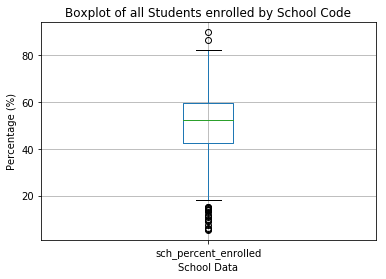

In [47]:
ax = dfCollegeAll.boxplot(column = ['sch_percent_enrolled'])
plt.title('Boxplot of all Students enrolled by School Code')
ax.set_xlabel('School Data')
ax.set_ylabel('Percentage (%)')

Missing values removed from district calculations as these schools are Non-District schools and therefore do not have data on the district level

Text(0,0.5,'Percentage (%)')

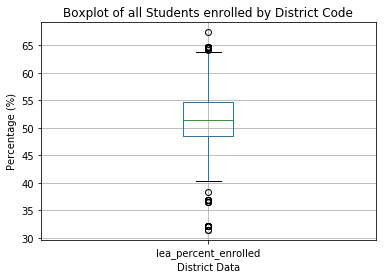

In [48]:
dfDistrict = dfCollegeAll[dfCollegeAll['leacount'].notna()]
ax = dfDistrict.boxplot(column = ['lea_percent_enrolled'])
plt.title('Boxplot of all Students enrolled by District Code')
ax.set_xlabel('District Data')
ax.set_ylabel('Percentage (%)')

#### Significantly higher than average college enrollment

Schools designed for honor level students looking to prepare for college through advanced academic classes and college credit courses. Highly motivated students and teachers. Build model with records included and excluded.


In [10]:
dfCollegeAll[dfCollegeAll['% School Enrolled'] > 80]

,Graduation Year,School/District/State ID,District,School,College Enrollment,Subgroup,Subgroup Name,School Count,District Count,State Count,% School Enrolled,% District Enrolled,% State Enrolled
617,2015,080700,Bertie County Schools,Bertie STEM High,ENROLL,ALL,All Students (Total or Subtotal,41.0,103.0,51362.0,82.000000,52.820513,51.988461
1098,2015,120310,Burke County Schools,Burke Middle College,ENROLL,ALL,All Students (Total or Subtotal,44.0,490.0,51362.0,86.274510,50.411523,51.988461
2826,2015,260354,Cumberland County Schools,Cross Creek Early College,ENROLL,ALL,All Students (Total or Subtotal,43.0,1783.0,51362.0,89.583333,49.638085,51.988461
8616,2015,650394,New Hanover County Schools,Wilmington Early College High,ENROLL,ALL,All Students (Total or Subtotal,31.0,1072.0,51362.0,81.578947,64.578313,51.988461


#### Significantly lower than average college enrollment

Deserves further inspection on why these schools are significantly less than the average percent of college enrollment

In [11]:
dfCollegeAll[dfCollegeAll['% School Enrolled'] < 20]

,Graduation Year,School/District/State ID,District,School,College Enrollment,Subgroup,Subgroup Name,School Count,District Count,State Count,% School Enrolled,% District Enrolled,% State Enrolled
1079,2015,120308,Burke County Schools,Hallyburton Academy,ENROLL,ALL,All Students (Total or Subtotal,11.0,490.0,51362.0,13.924051,50.411523,51.988461
2047,2015,190310,Chatham County Schools,SAGE Academy,ENROLL,ALL,All Students (Total or Subtotal,7.0,324.0,51362.0,14.583333,57.651246,51.988461
2376,2015,230330,Cleveland County Schools,"Turning Point Academy, Shelby",ENROLL,ALL,All Students (Total or Subtotal,5.0,561.0,51362.0,14.285714,50.044603,51.988461
2889,2015,260374,Cumberland County Schools,Alger B. Wilkins High School,ENROLL,ALL,All Students (Total or Subtotal,14.0,1783.0,51362.0,18.421053,49.638085,51.988461
3267,2015,290314,Davidson County Schools,Davidson County High School,ENROLL,ALL,All Students (Total or Subtotal,11.0,779.0,51362.0,15.068493,55.091938,51.988461
3730,2015,320322,Durham Public Schools,Durham's Performance Learning Center,ENROLL,ALL,All Students (Total or Subtotal,14.0,988.0,51362.0,13.861386,45.677300,51.988461
5104,2015,410395,Guilford County Schools,Early College at Guilford,ENROLL,ALL,All Students (Total or Subtotal,7.0,1720.0,51362.0,15.217391,32.077583,51.988461
5221,2015,410483,Guilford County Schools,Middle College High @ NC A&T,ENROLL,ALL,All Students (Total or Subtotal,5.0,1720.0,51362.0,18.518519,32.077583,51.988461
5941,2015,450343,Henderson County Schools,Balfour Education Center,ENROLL,ALL,All Students (Total or Subtotal,10.0,450.0,51362.0,14.925373,47.720042,51.988461
11900,2015,920528,Wake County Schools,Phillips High,ENROLL,ALL,All Students (Total or Subtotal,10.0,5844.0,51362.0,13.157895,59.541518,51.988461


# Boxplots of enrollment, enrollment by demographic, teacher experience, teacher education, licesened, and board certified.

### Explore Joint Attributes
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

# Identify interesting trends in scatter plot and heat map

### Explore Attributes and Class
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

# Identify attributes we hypothesis will be likely predictors of enrollment is postsecondary education

In [6]:
# colnames = {'graduation_year': 'Graduation Year', 
#             'unit_code': 'School/District/State ID', 
#             'leaname': 'District', 
#             'schname': 'School', 
#             'status': 'College Enrollment',
#             'subgroup': 'Subgroup',
#             'subgroup_name': 'Subgroup Name',
#             'schcount': 'School Count',
#             'leacount': 'District Count',
#             'seacount': 'State Count',
#             'sch_percent_enrolled': '% School Enrolled',
#             'lea_percent_enrolled': '% District Enrolled',
#             'sea_percent_enrolled': '% State Enrolled'
#            }

# dfCollege.rename(columns=colnames, inplace=True)

#### Basic column statistics

In [22]:
dfCollegeAll.describe()

,schcount,leacount,seacount,sch_percent_enrolled,lea_percent_enrolled,sea_percent_enrolled
count,516.000000,516.000000,547.0,547.000000,516.000000,5.470000e+02
mean,99.377907,1131.872093,51362.0,50.075406,51.039605,5.198846e+01
std,80.102959,1480.693630,0.0,14.519520,6.882989,2.773653e-13
min,5.000000,18.000000,51362.0,5.405405,31.428571,5.198846e+01
25%,36.000000,252.000000,51362.0,42.597141,48.443157,5.198846e+01
50%,81.500000,607.000000,51362.0,52.123552,51.403721,5.198846e+01
75%,137.250000,1178.000000,51362.0,59.565017,54.686947,5.198846e+01
max,423.000000,5844.000000,51362.0,89.583333,67.379679,5.198846e+01


#### Identify outliers

## Change columns names up here

In [14]:
# # renaming School_Name to schname and Lea_Name to leaname to match dfCollege variable names for merging later
# dfTeachersHS['schname'] = dfTeachersHS['School_Name']
# dfTeachersHS['leaname'] = dfTeachersHS['Lea_Name']

### Add in individual column stats

In [15]:
dfTeachersHS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 3083
Data columns (total 75 columns):
year                              817 non-null int64
unit_code                         817 non-null object
category_cd                       814 non-null object
total_class_teacher_num           817 non-null int64
total_nbpts_num                   817 non-null int64
prin_other_pct                    0 non-null float64
prinyrs_0thru3_pct                0 non-null float64
prinyrs_4thru10_pct               0 non-null float64
prinyrs_11plus_pct                0 non-null float64
prin_advance_dgr_pct              0 non-null float64
_1yr_prin_trnovr_pct              0 non-null float64
prin_male_pct                     0 non-null float64
prin_female_pct                   0 non-null float64
prin_black_pct                    0 non-null float64
prin_white_pct                    0 non-null float64
School_Name                       817 non-null object
Lea_Name                          817 non-n

In [16]:
dfTeachersHS.describe()

,year,total_class_teacher_num,total_nbpts_num,prin_other_pct,prinyrs_0thru3_pct,prinyrs_4thru10_pct,prinyrs_11plus_pct,prin_advance_dgr_pct,_1yr_prin_trnovr_pct,prin_male_pct,...,st_prinyrs_0thru3_pct,st_prinyrs_4thru10_pct,st_prinyrs_11plus_pct,st_prin_advance_dgr_pct,st_1yr_prin_trnovr_pct,st_prin_male_pct,st_prin_female_pct,st_prin_black_pct,st_prin_white_pct,st_prin_other_pct
count,817.0,817.0,817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02
mean,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
std,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.888170e-15,7.387522e-15,2.527310e-15,3.610443e-15,1.083133e-15,2.999445e-15,1.033142e-14,3.110536e-15,4.554713e-15,1.805222e-16
min,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
25%,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
50%,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
75%,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
max,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02


#### Why did we remove these columns

In [24]:
dfMergedSet = pd.merge(dfTeachersHS, dfCollegeAll, on = 'unit_code')

KeyError: 'unit_code'

In [18]:
dfTeachersHS.describe()

,year,total_class_teacher_num,total_nbpts_num,prin_other_pct,prinyrs_0thru3_pct,prinyrs_4thru10_pct,prinyrs_11plus_pct,prin_advance_dgr_pct,_1yr_prin_trnovr_pct,prin_male_pct,...,st_prinyrs_0thru3_pct,st_prinyrs_4thru10_pct,st_prinyrs_11plus_pct,st_prin_advance_dgr_pct,st_1yr_prin_trnovr_pct,st_prin_male_pct,st_prin_female_pct,st_prin_black_pct,st_prin_white_pct,st_prin_other_pct
count,817.0,817.0,817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02
mean,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
std,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.888170e-15,7.387522e-15,2.527310e-15,3.610443e-15,1.083133e-15,2.999445e-15,1.033142e-14,3.110536e-15,4.554713e-15,1.805222e-16
min,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
25%,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
50%,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
75%,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
max,2017.0,101107.0,11728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02


In [19]:
# Let's give these better names
colNames = {'year': 'Graduation Year', 'unit_code': 'School ID', 'category_cd': 'Grades Taught', 
            'total_class_teacher_num': 'No. Classroom Teachers', 'total_nbpts_num': 'No. Board Certified Teachers',
            'School_Name': 'School Name', 'Lea_Name': 'District Name', 'State_Name': 'State Name', 
            'flicensed_teach_pct': '% Licensed Teachers', 'tchyrs_0thru3_pct': '% 0-3 Year Experience',
            'tchyrs_4thru10_pct': '% 4-10 Year Experience', 'tchyrs_11plus_pct': '% 11+ Year Experience', 
            'class_teach_num': 'Avg. No. Classroom Teachers at School', 
            'nbpts_num': 'No. Board Certified Teachers at School', 'advance_dgr_pct': '% of Masters+ at School Level',
            'sch_percent_enrolled': '% Enrolled in College by School', 'lea_percent_enrolled': '% Enrolled in College by District'}
dfMergedSet.rename(columns=colNames, inplace=True)

NameError: name 'dfMergedSet' is not defined

In [20]:
corrColumnNames = [ '% Licensed Teachers',
                    '% 0-3 Year Experience',
                    '% 4-10 Year Experience',
                    '% 11+ Year Experience',
                    'Avg. No. Classroom Teachers at School',
                    'No. Board Certified Teachers at School',
                    '% of Masters+ at School Level',
                    '% Enrolled in College by School',
                    '% Enrolled in College by District']

ax = scatter_matrix(dfMergedSet[corrColumnNames], figsize=(15, 15))
plt.show()

NameError: name 'dfMergedSet' is not defined

In [21]:
dfMergedSet[corrColumnNames].corr('pearson')

NameError: name 'dfMergedSet' is not defined

In [22]:
sns.pairplot(dfMergedSet[corrColumnNames])

NameError: name 'dfMergedSet' is not defined

NameError: name 'dfMergedSet' is not defined

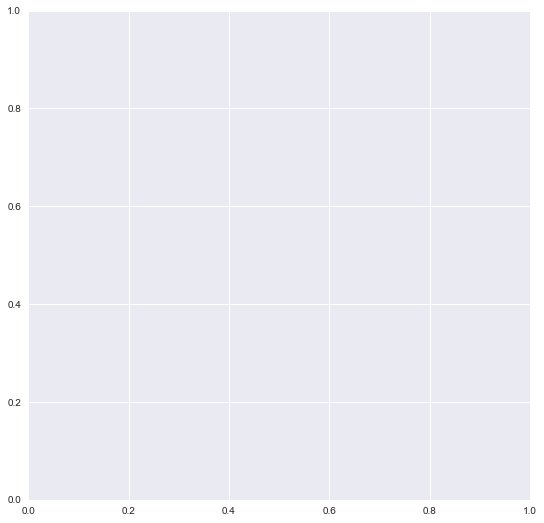

In [23]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(dfMergedSet[corrColumnNames].corr(), cmap=cmap, annot=True)

f.tight_layout()

In [ ]:
breaks = np.asarray(np.percentile(dfMergedSet.sch_percent_enrolled, [25,50,75,100]))
dfMergedSet['Quartiles of % College Enrolled'] = (dfMergedSet.sch_percent_enrolled.values > breaks[..., np.newaxis]).sum(0)
ax = dfMergedSet.boxplot(column='flicensed_teach_pct', by='Quartiles of % College Enrolled')
ax.xaxis.set_ticklabels(['0-25%', '25-50%', '50-75%', '75-100%'])
ax.set_xlabel('Quartiles of % College Enrolled')

### New Features
Are there other features that could be added to the data or created from existing features. Which ones?

As we continued the exploratory analysis related to college enrollment and personnel, we discussed if there might be interesting trends if health data were incorporated into the analysis. With the advent of Fitbit and Apple Watch technology, people are actively monitoring personal health, and health trends are becoming more prevalent in discussions about business and society. Additionally, most schools have metrics related to physical education, which could be incorporated into the data set and analysis. Attributes such as average number of daily steps, number of times exercised per week, resting heart rate, and school recess vs. no recess, for both students and teachers, might be useful.

### Exceptional Work
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.